## Libraries

In [1]:
import os
import warnings

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import MiniBatchKMeans
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split
import pickle

## Loading Data

In [2]:
def unpickle_file(file_name):
    with open(file_name, 'rb') as f:
        data= pickle.load(f)
    return data

In [39]:
target= unpickle_file('Data/target.pkl')
features= unpickle_file('Data/features.pkl')

In [40]:
print(features.columns)

Index(['orbit_id', 'epoch', 'e', 'i', 'om', 'w', 'ma', 'n', 'class', 'rms'], dtype='object')


# Performing Train - Test Split

In [41]:
train_features, test_features, train_target, test_target= train_test_split(features, target, test_size= 0.2, random_state= 42)

# Feature Engineering

## Performing K - Means Clustering

### Finding WCSS (Within-Cluster Sum of Squares) using MiniBatchKMeans

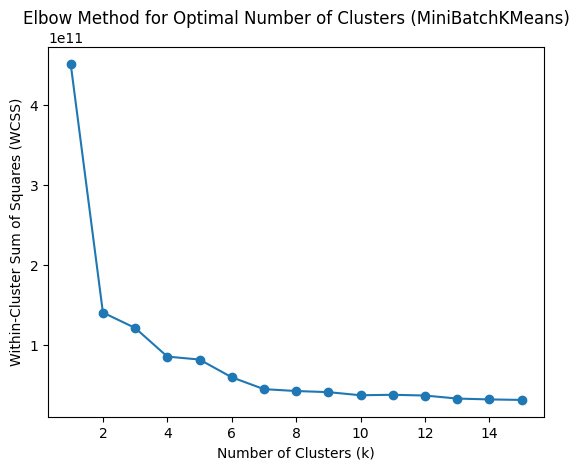

In [42]:
WCSS= []
for k in range(1, 16):
    KMeans= MiniBatchKMeans(k, random_state= 42)
    KMeans.fit(train_features)
    WCSS.append(KMeans.inertia_)

plt.plot(range(1, 16), WCSS, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters (MiniBatchKMeans)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)');

**k= 7** seems to be the elbow point.

### Performing Clustering with Optimal Cluster Counts

In [43]:
optimal_clusters = 7

# Fit MiniBatchKMeans with the optimal number of clusters
KMeans = MiniBatchKMeans(optimal_clusters, random_state=42)
train_cluster_labels = KMeans.fit_predict(train_features)
test_cluster_labels = KMeans.predict(test_features)

In [46]:
train_features['cluster'] = train_cluster_labels
test_features['cluster'] = test_cluster_labels

# Data Visualization

## Checking Class Distribution in Target Label

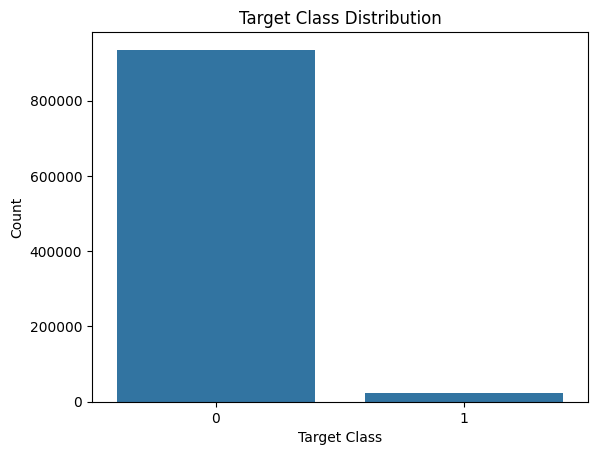

In [10]:
sns.barplot(x= target.unique(),
            y= target.value_counts())
plt.xlabel('Target Class')
plt.ylabel('Count')

plt.title('Target Class Distribution');

- The data of target label is highly imbalanced.
- As the target label is highly imbalanced, we should perform an upsampling in the data as the NEO(1) is more important to be predict correctly.

### Performing Over Sampling

In [48]:
ROS= RandomOverSampler(sampling_strategy= 'minority', random_state= 42)

resampled_train_features, resampled_train_target= ROS.fit_resample(train_features, train_target)

### Target Class Distribution After Performing Over Sampling

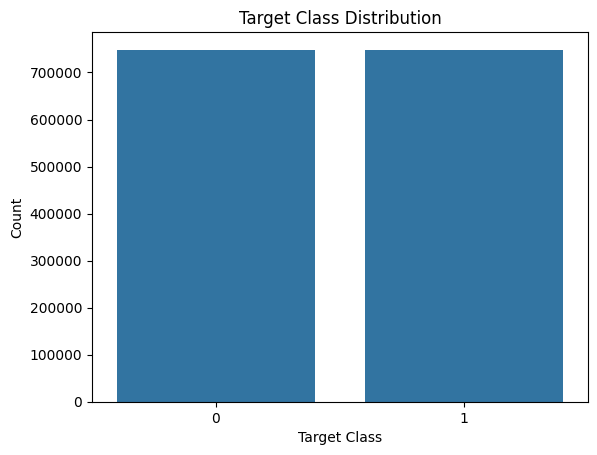

In [49]:
sns.barplot(x= resampled_train_target.unique(),
            y= resampled_train_target.value_counts())
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.title('Target Class Distribution');

# Saving Final Prepared Data

In [50]:
def pickle_file(dataframe, file_name, folder_name='Data'):
    os.makedirs(folder_name, exist_ok=True)
    full_path = os.path.join(folder_name, file_name)
    with open(full_path, 'wb') as f:
        pickle.dump(dataframe, f)
        print(full_path)

In [51]:
pickle_file(resampled_train_features, 'resampled_train_features.pkl')
pickle_file(resampled_train_target, 'resampled_train_target.pkl')
pickle_file(test_features, 'test_features.pkl')
pickle_file(test_target, 'test_target.pkl')

Data\resampled_train_features.pkl
Data\resampled_train_target.pkl
Data\test_features.pkl
Data\test_target.pkl
